In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# plt.imshow(x_train[9], cmap="gray")

In [3]:
# normalize pixel values
x_train, x_test = x_train/255.0, x_test/255.0

# Train

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
predictions = model(x_train[:1]).numpy()

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

2.260032

In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


c:\Users\BikramKumar\anaconda3\envs\ml_env\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 21s 7ms/step - loss: 0.3001 - accuracy: 0.9126
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1445 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1104 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0905 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0752 - accuracy: 0.9766


# Test

1/1 [==============================] - 0s 260ms/step
4


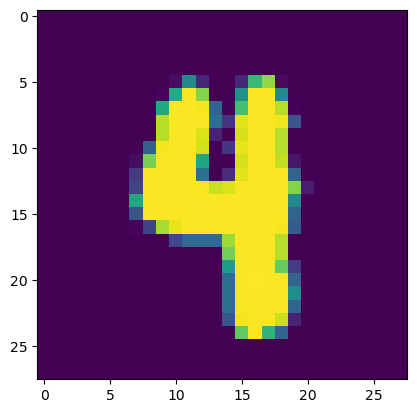

In [41]:
test_index = 250
print(np.argmax(model.predict(x_test[test_index])))
plt.imshow(x_test[test_index])


In [11]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 0.1442 - accuracy: 0.9574 - 2s/epoch - 6ms/step


[0.1441972404718399, 0.9574000239372253]